# Import some libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler , LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Import Data Base

In [5]:
df = pd.read_csv("path")

# Previewing Heart Attack Prediction Dataset

In [6]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# Identifying Missing Values in the Heart Attack Prediction Dataset

In [7]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

# Summary of Data Types and Non-Null Counts in the Heart Attack Prediction Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### Removing the 'Patient ID' Column from the Heart Attack Prediction Dataset

In [9]:
df.drop('Patient ID' , axis=1 , inplace = True)

### Counting Duplicate Rows in the Heart Attack Prediction Dataset

In [10]:
df.duplicated().sum()

0

### Extracting Systolic and Diastolic Pressure from the 'Blood Pressure' Column

In [11]:
df['Systolic pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[0])
df['Diastolic pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[1])

### Dropping the Original 'Blood Pressure' Column After Extraction

In [12]:
df.drop('Blood Pressure' , axis=1 , inplace = True)

## Visualizing the Distribution of Heart Attack Risk Levels

C:\Users\AsrNOavaran\AppData\Local\Temp\ipykernel_31708\942609324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x= 'Heart Attack Risk'  ,palette='Set1')


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

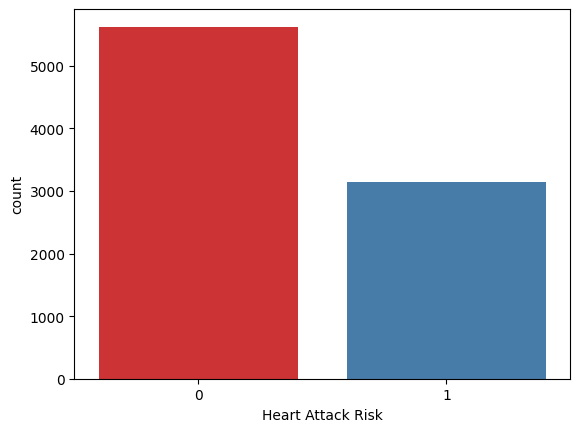

In [24]:
sns.countplot(data = df , x= 'Heart Attack Risk'  ,palette='Set1')

## Analyzing the Impact of Smoking on Heart Rate by Heart Attack Risk Category

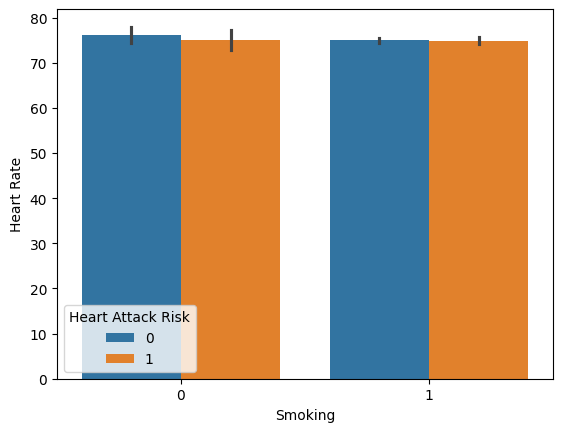

In [25]:
sns.barplot(data = df , x='Smoking' , y ='Heart Rate' , hue='Heart Attack Risk') 
plt.show()

## Distribution of Income in the Heart Attack Prediction Dataset

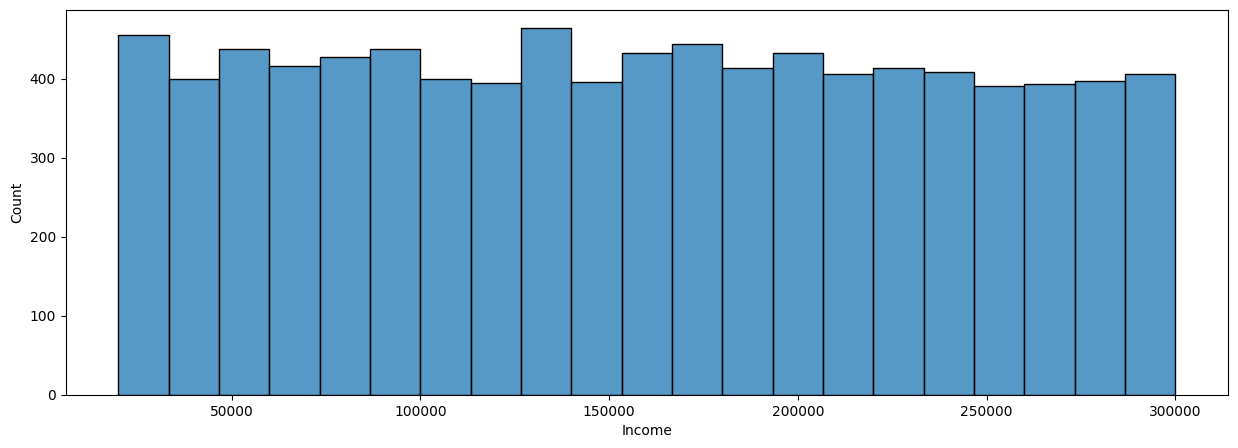

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data = df , x='Income')
plt.show()

## Gender Distribution in the Heart Attack Prediction Dataset

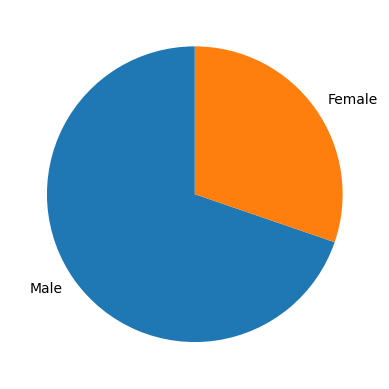

In [27]:
plt.pie(data=df , x=df['Sex'].value_counts() , labels=df['Sex'].unique(),startangle=90)
plt.show()

## Relationship Between Sleep Hours and Physical Activity Days Per Week

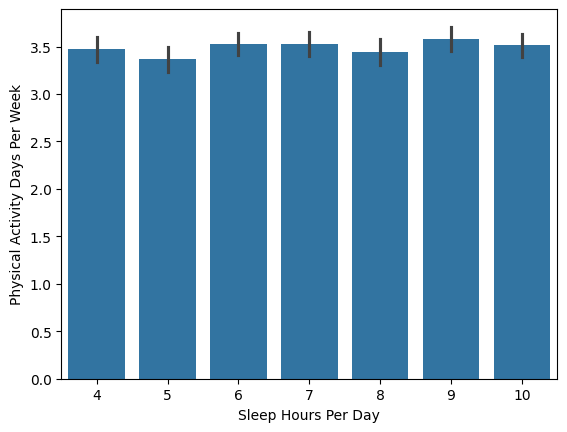

In [28]:
sns.barplot(data=df , y='Physical Activity Days Per Week' , x = 'Sleep Hours Per Day') 
plt.show()

## Distribution of Heart Attack Risk by Country

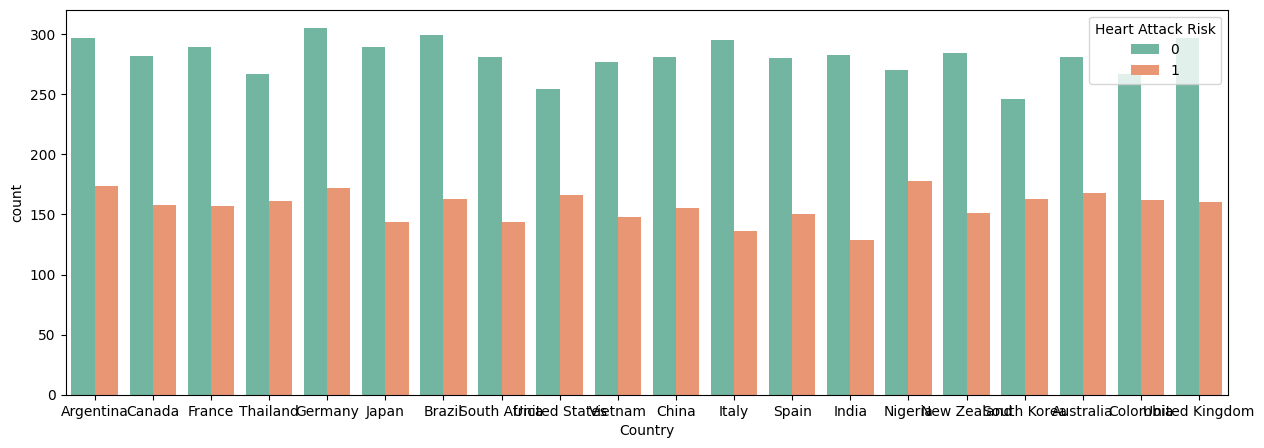

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data=df , x= 'Country' , hue = 'Heart Attack Risk' ,  palette='Set2')
plt.show()

## Heatmap of Correlations Among Numeric Features in the Heart Attack Prediction Dataset

<Axes: >

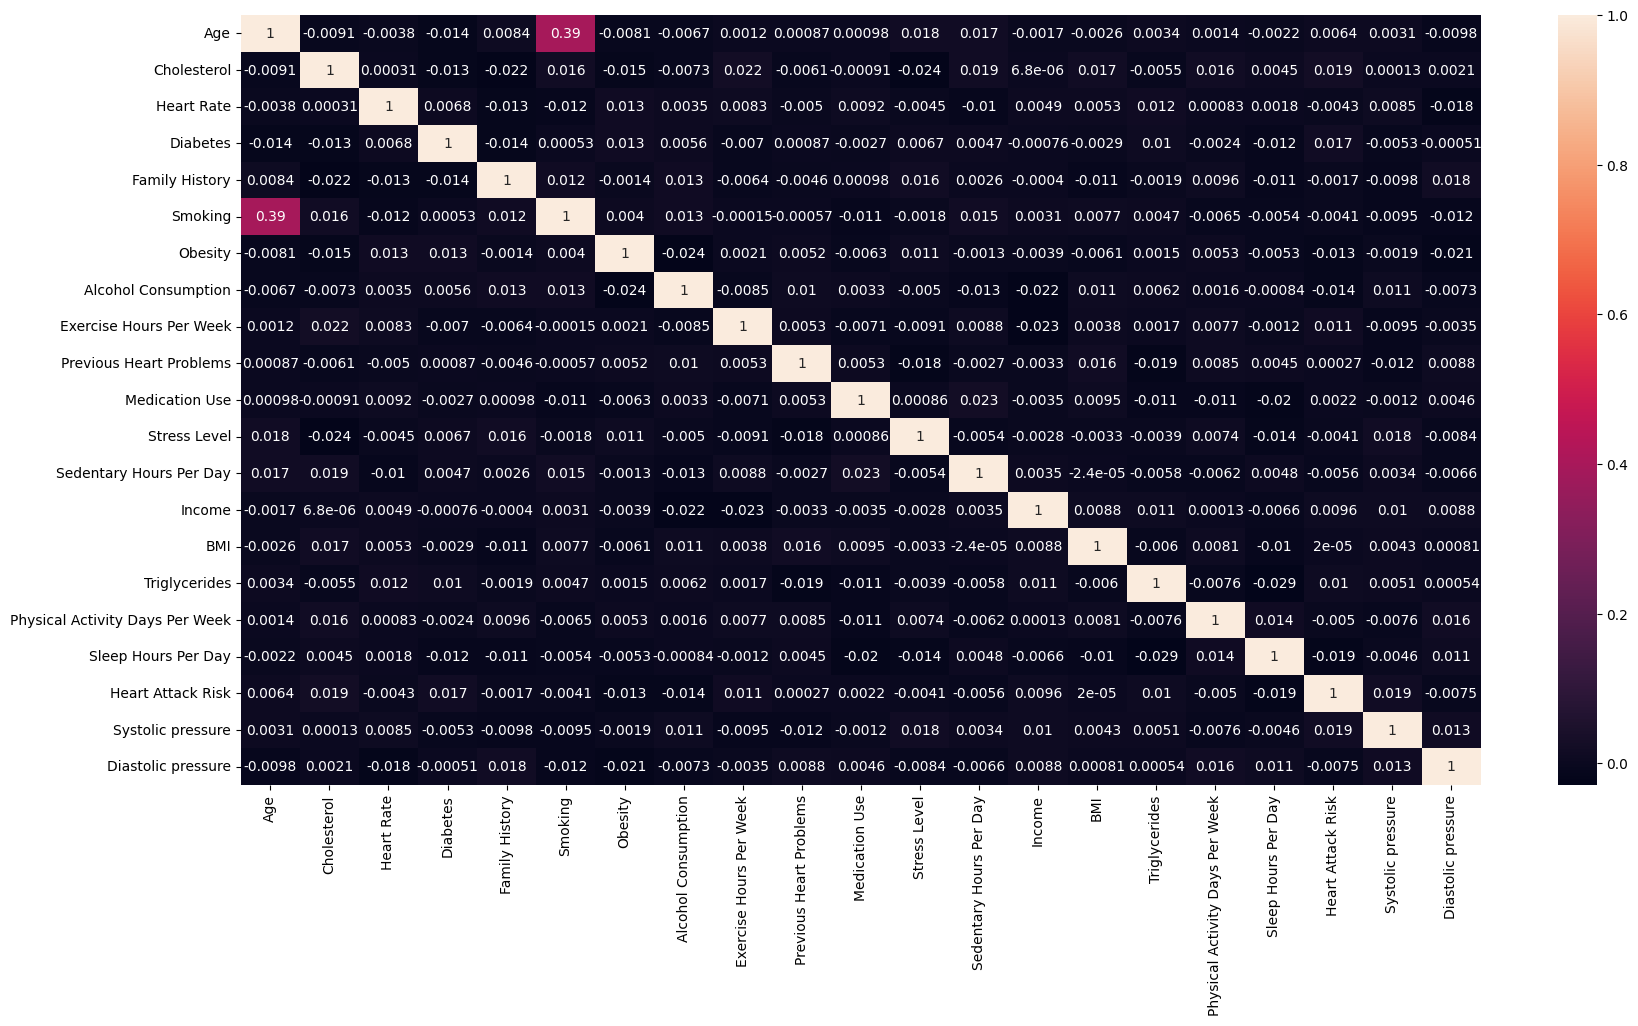

In [30]:
plt.figure(figsize=(20 , 10))
sns.heatmap(df.corr(numeric_only = True) , annot=True)